# Day 1: Basics about variables and FITS I/O

## Reference

### Concise introductions of Julia

- [Julia By Example](https://juliabyexample.helpmanual.io/)
- [Julia Workshop 2020 @ University of Oulu, Finnland](https://github.com/crstnbr/JuliaOulu20)
- [Julia workshop 2021 @ HPC.NRW](https://github.com/crstnbr/JuliaNRW21)
- [Learn Julia in Y minutes](https://learnxinyminutes.com/docs/julia/)

### Basics about the variables

- [Julia document about Variables](https://docs.julialang.org/en/v1/manual/variables/)

### FITS I/O

In [1]:
using Printf
using FITSIO

## [Variable](https://docs.julialang.org/en/v1/manual/variables/)

In [6]:
光头 = "怪博士"

"怪博士"

In [30]:
typeof(光头)

String

-  Unicode variable names: \ + variable name + Tab
    - Unicode operations are entered in this pattern \name[tab]. That is a slash, \, the name (e.g., alpha), and then a press of the tab key.
    - [Available unicodes](https://docs.julialang.org/en/v1/manual/unicode-input/)

In [10]:
α = 2

2

In [15]:
# Can use supscript or subscript
X₁ = 2

2

In [17]:
# Can combine a series of LaTeX like commands together:
# e.g. α̂⁽²⁾ by \alpha-tab-\hat- tab-\^(2)-tab.  
α̂² = π + 1

4.141592653589793

- Search for the unicode command using ? + Symbol (copied from elsewhere)

In [27]:
?𝐂

"𝐂" can be typed by \bfC<tab>

search:

Couldn't find 𝐂
Perhaps you meant \, α, !, %, &, ', *, +, -, /, :, <, >, ^, |, ~, ÷, π, ℯ or ∈


No documentation found.

Binding `𝐂` does not exist.


### Styles

- Variables in lower case.
- Underscores as word separation is **discouraged**.
- Names of Type and Module begin with a capital letter.
- Names of functions and macros are in lower case without word separators.

## [Integers and Floating Point Numbers](https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/)

- `Int8/16/32/128` and `UInt8/16/32/64/128`
- `Float16/32/64`
- `Bool`

In [29]:
Sys.WORD_SIZE

64

In [47]:
Int, UInt

# There is no "Float"

(Int64, UInt64)

In [49]:
for T in [Int16, Int32, Int64, UInt16, UInt32, UInt64]
    println("$(lpad(T, 7)): [$(typemin(T)), $(typemax(T))]")
end

  Int16: [-32768, 32767]
  Int32: [-2147483648, 2147483647]
  Int64: [-9223372036854775808, 9223372036854775807]
 UInt16: [0, 65535]
 UInt32: [0, 4294967295]
 UInt64: [0, 18446744073709551615]


In [34]:
a = 1

1

In [35]:
typeof(1)

Int64

In [36]:
Float16(a)

Float16(1.0)

In [37]:
b = 1.0

1.0

In [39]:
typeof(b)

Float64

In [40]:
Int32(b)

1

In [42]:
Bool(a)

true

In [43]:
Bool(b)

true

In [50]:
# For large integer
big(10)^20

100000000000000000000

- Division by zero 

In [51]:
1.0 / 0

Inf

In [52]:
-1.0 / 0

-Inf

- E-notation

In [54]:
1e10

1.0e10

In [58]:
# Using f for Float32
1.23f-2

0.0123f0

- Underscore as digit separator

In [60]:
10_000

10000

In [61]:
1.233_333

1.233333

- `sizeof` function

In [63]:
sizeof(a)

8

In [64]:
sizeof(光头)

9

In [65]:
?sizeof()

```
sizeof(T::DataType)
sizeof(obj)
```

Size, in bytes, of the canonical binary representation of the given `DataType` `T`, if any. Size, in bytes, of object `obj` if it is not `DataType`.

# Examples

```jldoctest
julia> sizeof(Float32)
4

julia> sizeof(ComplexF64)
16

julia> sizeof(1.0)
8

julia> sizeof([1.0:10.0;])
80
```

If `DataType` `T` does not have a specific size, an error is thrown.

```jldoctest
julia> sizeof(AbstractArray)
ERROR: Abstract type AbstractArray does not have a definite size.
Stacktrace:
[...]
```

---

```
sizeof(str::AbstractString)
```

Size, in bytes, of the string `str`. Equal to the number of code units in `str` multiplied by the size, in bytes, of one code unit in `str`.

# Examples

```jldoctest
julia> sizeof("")
0

julia> sizeof("∀")
3
```


- `Inf`, `-Inf`, `NaN`

In [68]:
typeof(NaN)

Float64

In [69]:
typeof(Inf)

Float64

In [70]:
1 / Inf

0.0

In [71]:
1 / -Inf

-0.0

In [72]:
0.0 == -0.0

true

In [73]:
(typemin(Float64),typemax(Float64))

(-Inf, Inf)

- Machine $\epsilon$

In [74]:
eps(Float32)

1.1920929f-7

In [76]:
eps(100.)

1.4210854715202004e-14

- Arbitrary Precision Arithmetic

In [77]:
y = BigInt(typemin(Int64))

-9223372036854775808

In [78]:
y -= 1

-9223372036854775809

In [79]:
typeof(y)

BigInt

- Numeric Literal Coefficients

In [80]:
x = 2 

2x^3x + 4.5x + 1

138.0

In [82]:
# The precedence of numeric literal coefficients used for implicit multiplication is higher 
# than other binary operators such as multiplication (*), and division (/, \, and //). 

1 / 2x

0.25

In [83]:
6 // 2x

3//2

- Parenthesized expressions can be used as coefficients to variables

In [86]:
(2x + 1)x

10

In [87]:
# But...
(x - 5)(2x + 3)

LoadError: MethodError: objects of type Int64 are not callable

In [88]:
2x(x-1)

LoadError: MethodError: objects of type Int64 are not callable

- Literal zero and one

In [89]:
zero(Float64), one(Int32)

(0.0, 1)

## FITSIO

In [2]:
# Check CFITSIO version
FITSIO.libcfitsio_version()

v"3.49.0"

In [3]:
fits_file = FITS("/Users/song/Dropbox/work/project/huoguo/huoguo/data/M51.fits")

File: /Users/song/Dropbox/work/project/huoguo/huoguo/data/M51.fits
Mode: "r" (read-only)
HDUs: Num  Name  Type   
      1          Image  

In [4]:
FITSIO.length(fits_file)

1

In [5]:
img = read(fits_file[1]);

In [6]:
read(fits_file[1], 20:100, 20:100)

81×81 Matrix{Int16}:
 40  38  38  39  40  39  41  39  41  …  40  43  48  50  45  40  40  45  43
 40  39  41  40  39  36  37  38  39     42  42  47  48  42  41  41  41  40
 42  40  35  38  41  40  41  39  42     43  42  48  48  47  45  40  41  41
 39  38  39  39  41  45  42  39  39     48  48  50  46  45  46  40  44  47
 38  37  41  39  40  40  38  39  41     47  43  46  48  44  43  42  46  45
 41  40  38  39  40  39  38  37  38  …  43  45  42  44  45  38  41  44  41
 39  38  37  38  35  38  41  42  41     41  43  41  45  43  42  40  42  40
 39  40  38  37  40  38  41  43  40     42  40  39  48  42  42  38  44  42
 39  41  38  37  37  37  39  40  39     40  41  39  42  41  42  42  42  39
 38  42  41  39  38  39  41  41  38     43  40  38  41  41  44  43  42  40
 42  43  41  40  41  40  41  42  40  …  42  38  44  41  42  40  43  39  45
 40  42  39  39  39  38  39  41  39     42  39  41  40  40  39  41  44  43
 38  40  38  39  38  38  40  41  38     41  41  39  39  42  43  43  42  40
  ⋮ 

In [7]:
img_header = read_header(fits_file[1])

SIMPLE  =                    T / Fits standard
BITPIX  =                   16 / Bits per pixel
NAXIS   =                    2 / Number of axes
NAXIS1  =                  512 / Axis length
NAXIS2  =                  512 / Axis length
EXTEND  =                    F / File may contain extensions
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator
DATE    = '2016-11-02T13:58:47' / Date FITS file was generated
IRAF-TLM= '2016-11-02T13:58:47' / Time of last modification
OBJECT  =       'm51  B  600s' / Name of the object observed
IRAF-MAX=              19936.0 /  DATA MAX
IRAF-MIN=                 -1.0 /  DATA MIN
CCDPICNO=                   53 /  ORIGINAL CCD PICTURE NUMBER
ITIME   =                  600 /  REQUESTED INTEGRATION TIME (SECS)
TTIME   =                  600 /  TOTAL ELAPSED TIME (SECS)
OTIME   =                  600 /  ACTUAL INTEGRATION TIME (SECS)
DATA-TYP=         'OBJECT (0)' /  OBJECT,DARK,BIAS,ETC.
DATE-OBS=           '05/04/87' /  DATE DD/MM/YY
RA  

In [8]:
typeof(img_header)

FITSHeader

In [9]:
img_header["ZD"]

"22:14:00.00"

In [10]:
haskey(img_header, "NAXIS1")

true

In [11]:
# Read key directly from the image
read_key(fits_file[1], "NAXIS2")

(512, "Axis length")

- Create a header

In [12]:
FITSIO.FITSHeader(["TYPE", "EXPTIME"], ["image", 1024.00], ["This is an image", "Exposure time in seconds"])

TYPE    =              'image' / This is an image
EXPTIME =               1024.0 / Exposure time in seconds

### Display the image using `PyPlot`

In [147]:
import Pkg
Pkg.add("PyCall")

   Resolving package versions...
    Updating `~/.julia/environments/v1.6/Project.toml`
  [438e738f] + PyCall v1.92.3
  No Changes to `~/.julia/environments/v1.6/Manifest.toml`


In [151]:
ENV["PYTHON"] = "/usr/local/bin/python3";

In [152]:
Pkg.build("PyCall")

    Building Conda ─→ `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/299304989a5e6473d985212c28928899c74e9421/build.log`
    Building PyCall → `~/.julia/scratchspaces/44cfe95a-1eb2-52ea-b672-e2afdf69b78f/169bb8ea6b1b143c5cf57df6d34d022a7b60c6db/build.log`
Precompiling project...
  ✓ PyCall
  ✓ PyPlot
  2 dependencies successfully precompiled in 8 seconds (40 already precompiled)
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions


In [13]:
using PyPlot
using PyCall

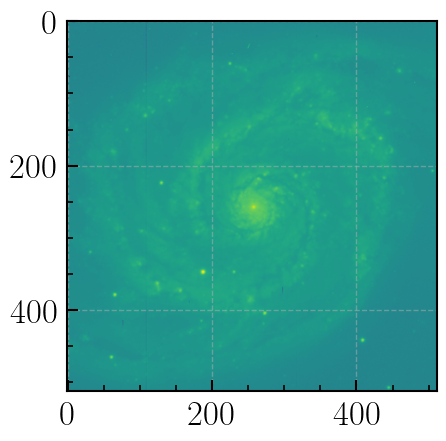

PyObject <matplotlib.image.AxesImage object at 0x15b75a6a0>

In [14]:
PyPlot.imshow(asinh.(img))

In [17]:
@time asinh.(img);

  0.007716 seconds (4 allocations: 2.000 MiB)


In [18]:
@pyimport kungpao.display as kdp

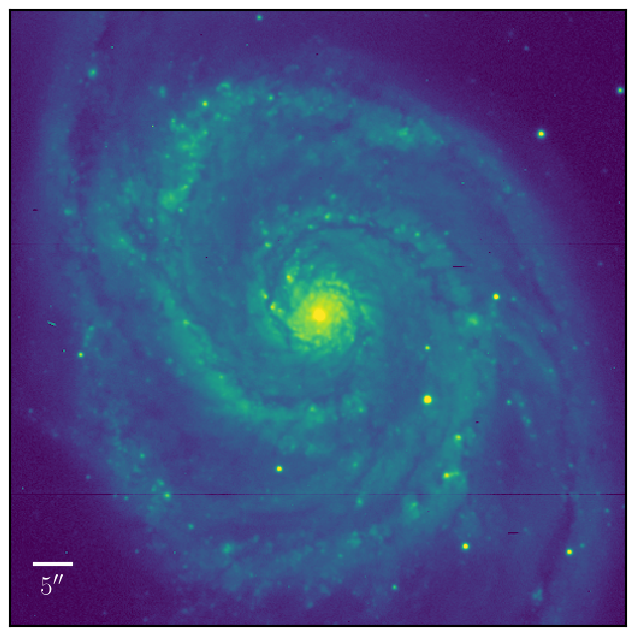

In [26]:
_ = kdp.display_single(PyCall.PyReverseDims(img));

In [34]:
size(img)

(512, 512)

In [35]:
2^2

4

In [37]:
function cart2polar(x, y)
    return sqrt.(x^2 + y^2), atan.(x, y)
end

cart2polar (generic function with 1 method)

In [39]:
@time cart2polar(1., 1.)

  0.000001 seconds


(1.4142135623730951, 0.7853981633974483)

In [49]:
x = y = 0:1:100

0:1:100

In [52]:
@time cart2polar.(x, y)

  0.000033 seconds (5 allocations: 1.953 KiB)


101-element Vector{Tuple{Float64, Float64}}:
 (0.0, 0.0)
 (1.4142135623730951, 0.7853981633974483)
 (2.8284271247461903, 0.7853981633974483)
 (4.242640687119285, 0.7853981633974483)
 (5.656854249492381, 0.7853981633974483)
 (7.0710678118654755, 0.7853981633974483)
 (8.48528137423857, 0.7853981633974483)
 (9.899494936611665, 0.7853981633974483)
 (11.313708498984761, 0.7853981633974483)
 (12.727922061357855, 0.7853981633974483)
 (14.142135623730951, 0.7853981633974483)
 (15.556349186104045, 0.7853981633974483)
 (16.97056274847714, 0.7853981633974483)
 ⋮
 (125.86500705120545, 0.7853981633974483)
 (127.27922061357856, 0.7853981633974483)
 (128.69343417595164, 0.7853981633974483)
 (130.10764773832474, 0.7853981633974483)
 (131.52186130069785, 0.7853981633974483)
 (132.93607486307093, 0.7853981633974483)
 (134.35028842544403, 0.7853981633974483)
 (135.7645019878171, 0.7853981633974483)
 (137.17871555019022, 0.7853981633974483)
 (138.59292911256333, 0.7853981633974483)
 (140.0071426749364, 0.